<a href="https://colab.research.google.com/github/BhagyashreeMP/Mechanical_AI_Projects/blob/main/Prediction_Maintainance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch pandas numpy matplotlib scikit-learn

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load a free pre-trained BERT model and tokenizer from Hugging Face
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Binary classification (normal vs faulty)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Generate synthetic sensor data (vibration data)
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 1))  # Normal operating data
faulty_data = np.random.normal(loc=4, scale=1, size=(50, 1))    # Faulty data, indicating issues

In [ ]:
# Combine normal and faulty data
sensor_data = np.vstack([normal_data, faulty_data])
np.random.shuffle(sensor_data)

# Scale the data between 0 and 1 for better tokenization
scaler = MinMaxScaler()
sensor_data_scaled = scaler.fit_transform(sensor_data)

# Convert to a pandas DataFrame for easier handling
df = pd.DataFrame(sensor_data_scaled, columns=['vibration'])

In [ ]:
# Preprocess the data for DistilBERT
def preprocess_data(data, max_len=128):
    # Tokenize the sensor data as text (convert float to string and feed it as a sequence)
    tokenized_inputs = tokenizer([str(val[0]) for val in data],
                                 padding=True, truncation=True, max_length=max_len, return_tensors="pt")
    return tokenized_inputs

In [ ]:

# Function to detect anomalies
def detect_anomalies(data):
    inputs = preprocess_data(data)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    return predictions.numpy()

# Detect anomalies in the scaled sensor data
predictions = detect_anomalies(df[['vibration']])

# Add predictions to the DataFrame
df['anomaly'] = predictions  # 1 for faulty, 0 for normal

# Separate anomalies for visualization
anomalies = df[df['anomaly'] == 1]

ValueError: Length of values (1) does not match length of index (1050)

NameError: name 'anomalies' is not defined

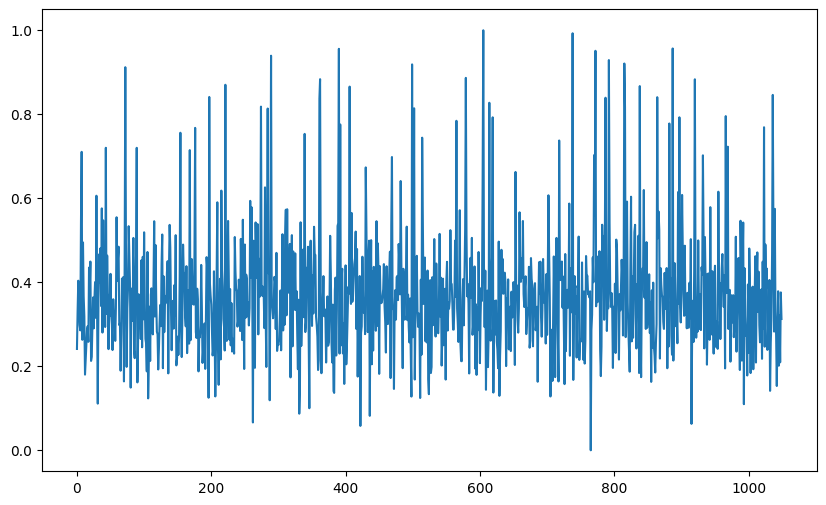

In [ ]:
# Plot the sensor data with anomalies marked
plt.figure(figsize=(10, 6))
plt.plot(df['vibration'], label='Sensor Data')
plt.scatter(anomalies.index, anomalies['vibration'], color='red', label='Anomalies', marker='x')
plt.title('Fault Detection in Sensor Data using DistilBERT')
plt.xlabel('Sample Index')
plt.ylabel('Vibration Amplitude (Scaled)')
plt.legend()
plt.show()

In [ ]:
# Output number of detected anomalies
print(f"Number of detected anomalies: {len(anomalies)}")

NameError: name 'anomalies' is not defined